In [1]:
from IPython.display import display, Markdown

import pandas as pd

In [4]:
df = pd.read_csv('../data/samples/pokemon.csv')

In [5]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


## By Type 1

In [4]:
qty = df.groupby('Type 1').agg('count')['Name']
qty

Type 1
Bug          69
Dark         31
Dragon       32
Electric     44
Fairy        17
Fighting     27
Fire         52
Flying        4
Ghost        32
Grass        70
Ground       32
Ice          24
Normal       98
Poison       28
Psychic      57
Rock         44
Steel        27
Water       112
Name: Name, dtype: int64

### Median of attr

In [5]:
type1 = df.groupby('Type 1').agg('median')[['HP','Attack','Defense','Sp. Atk', 'Sp. Def', 'Speed', 'Total']]
type1

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Total
Type 1,,,,,,,
Bug,60.0,65.0,60.0,50.0,60.0,60.0,395.0
Dark,65.0,88.0,70.0,65.0,65.0,70.0,465.0
Dragon,80.0,113.5,90.0,105.0,90.0,90.0,600.0
Electric,60.0,65.0,65.0,95.0,79.5,88.0,477.5
Fairy,78.0,52.0,66.0,75.0,79.0,45.0,405.0
Fighting,70.0,100.0,70.0,40.0,63.0,60.0,455.0
Fire,70.0,84.5,64.0,85.0,67.5,78.5,482.0
Flying,79.0,85.0,75.0,103.5,80.0,116.0,557.5
Ghost,59.5,66.0,72.5,65.0,75.0,60.5,464.5


In [6]:
type1[['Total']].sort_values(by=['Total'])

,Total
Type 1,
Bug,395.0
Poison,401.5
Fairy,405.0
Normal,415.0
Grass,430.0
Ground,440.0
Water,455.0
Fighting,455.0
Ghost,464.5


## By Pokemon

### Top 10 most powerfull pokemon

In [7]:
df.sort_values(by=['Total'], ascending=False).head(10)[['#','Name', 'Total']]

,#,Name,Total
426,384,RayquazaMega Rayquaza,780
164,150,MewtwoMega Mewtwo Y,780
163,150,MewtwoMega Mewtwo X,780
422,382,KyogrePrimal Kyogre,770
424,383,GroudonPrimal Groudon,770
552,493,Arceus,720
712,646,KyuremWhite Kyurem,700
711,646,KyuremBlack Kyurem,700
409,373,SalamenceMega Salamence,700
413,376,MetagrossMega Metagross,700


In [18]:



import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Type 1

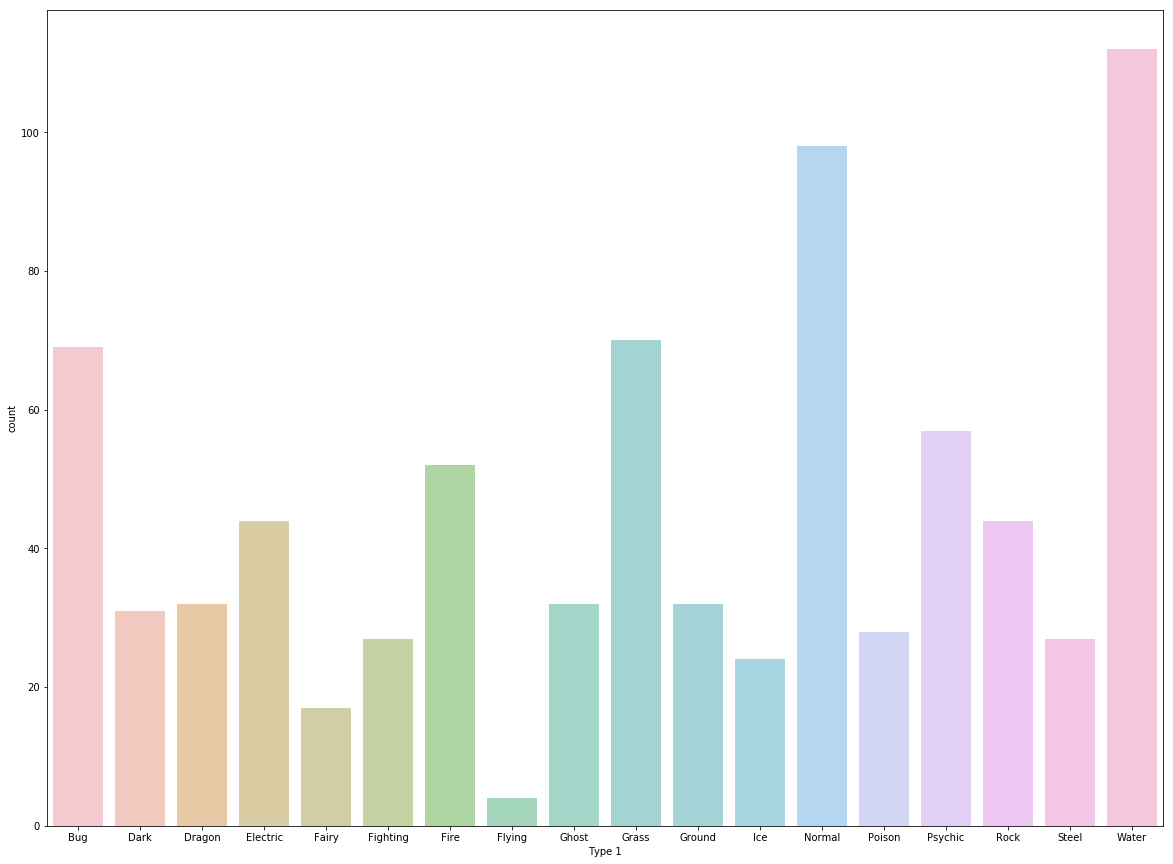

### Type 2

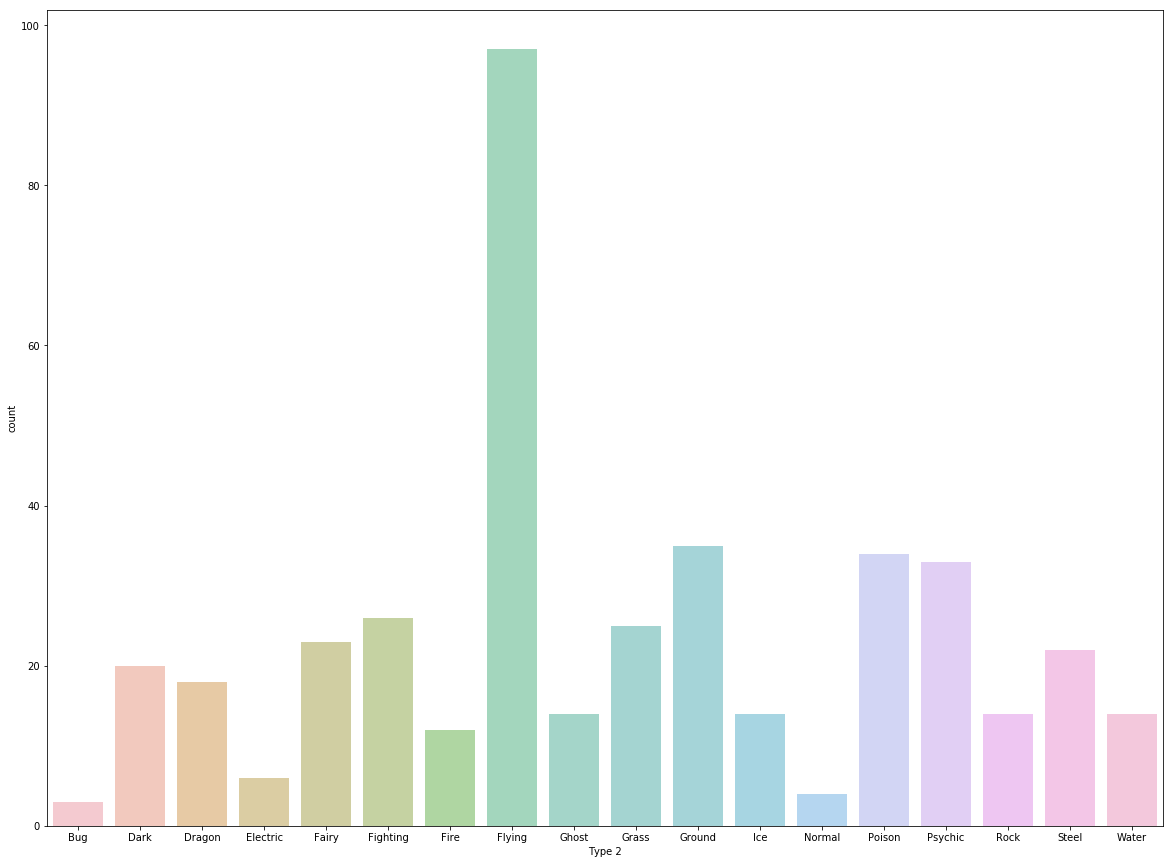

### Total

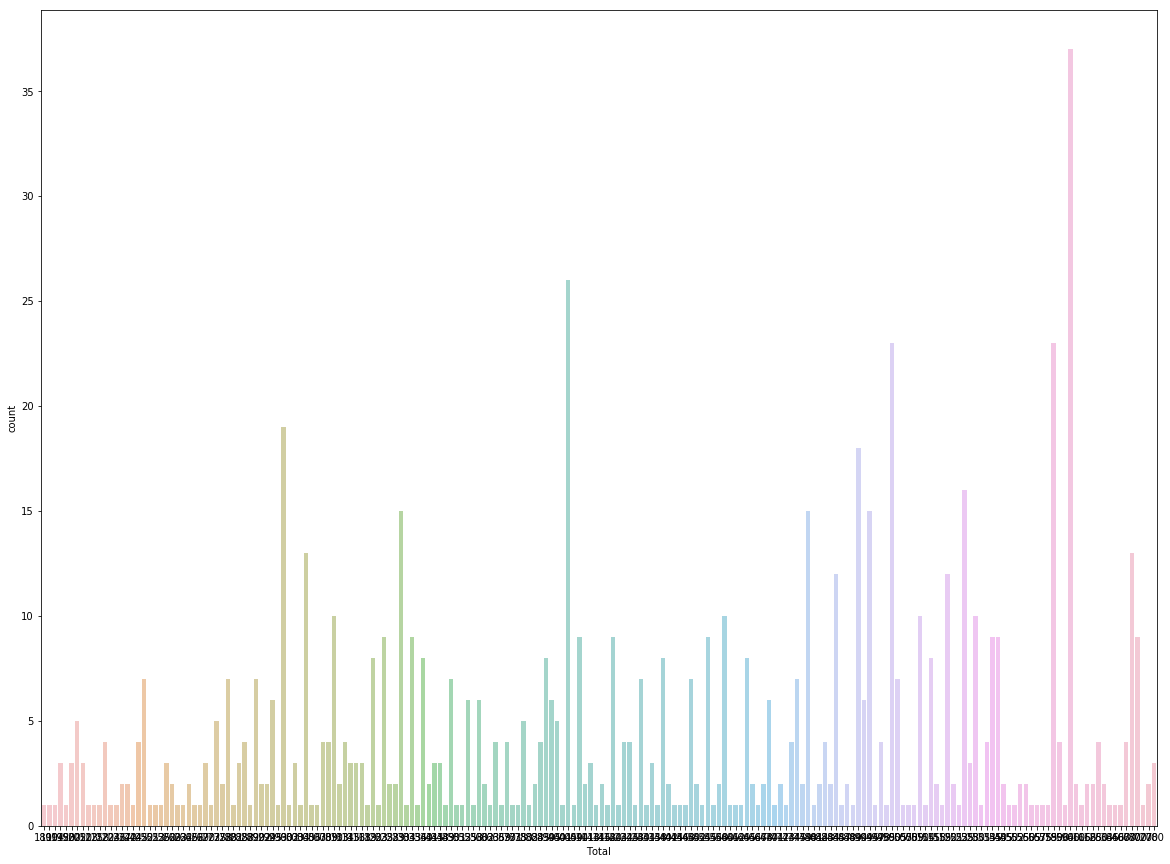

### HP

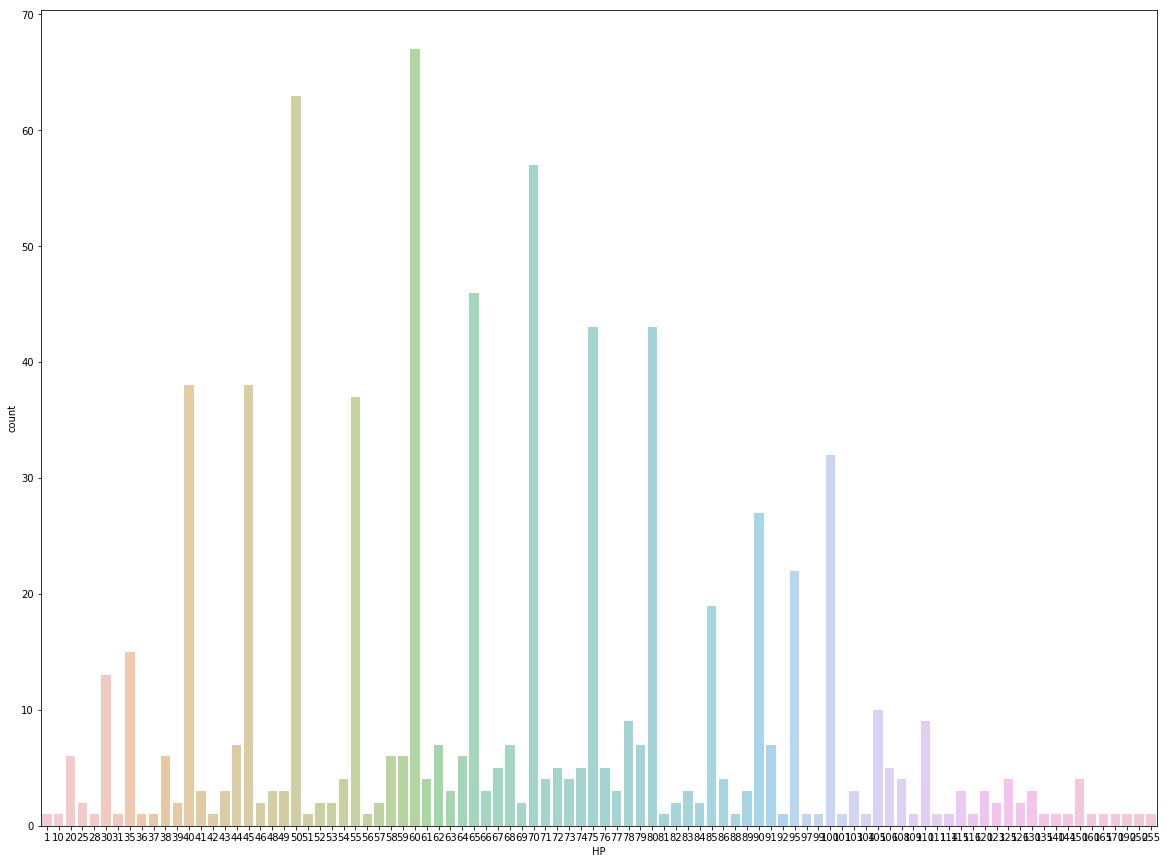

### Attack

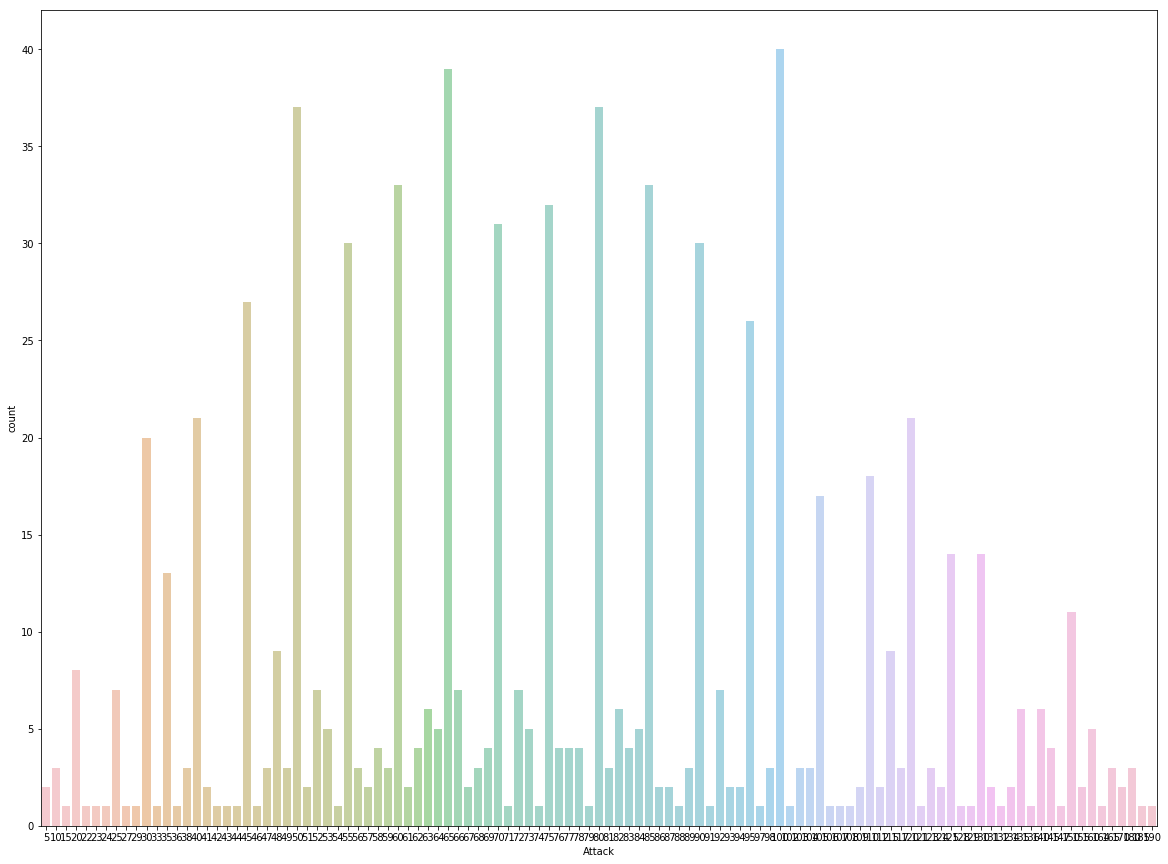

### Defense

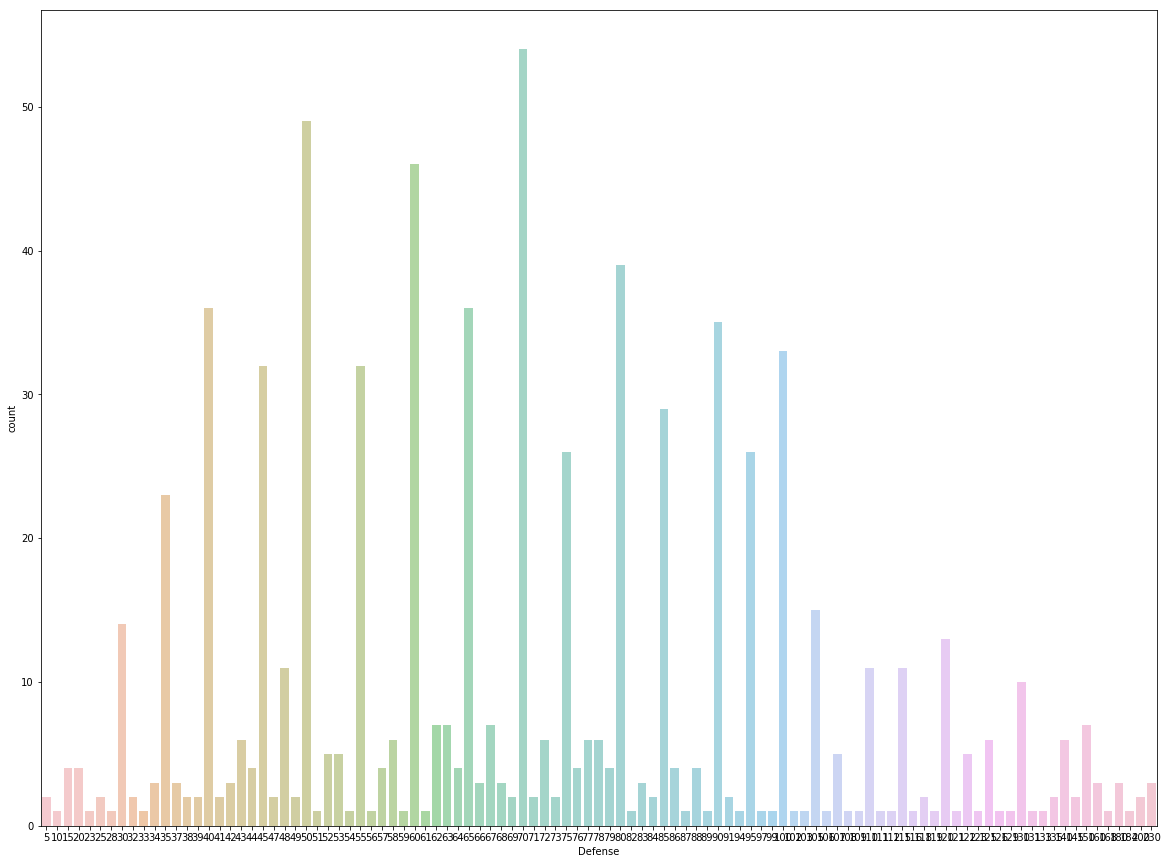

### Sp. Atk

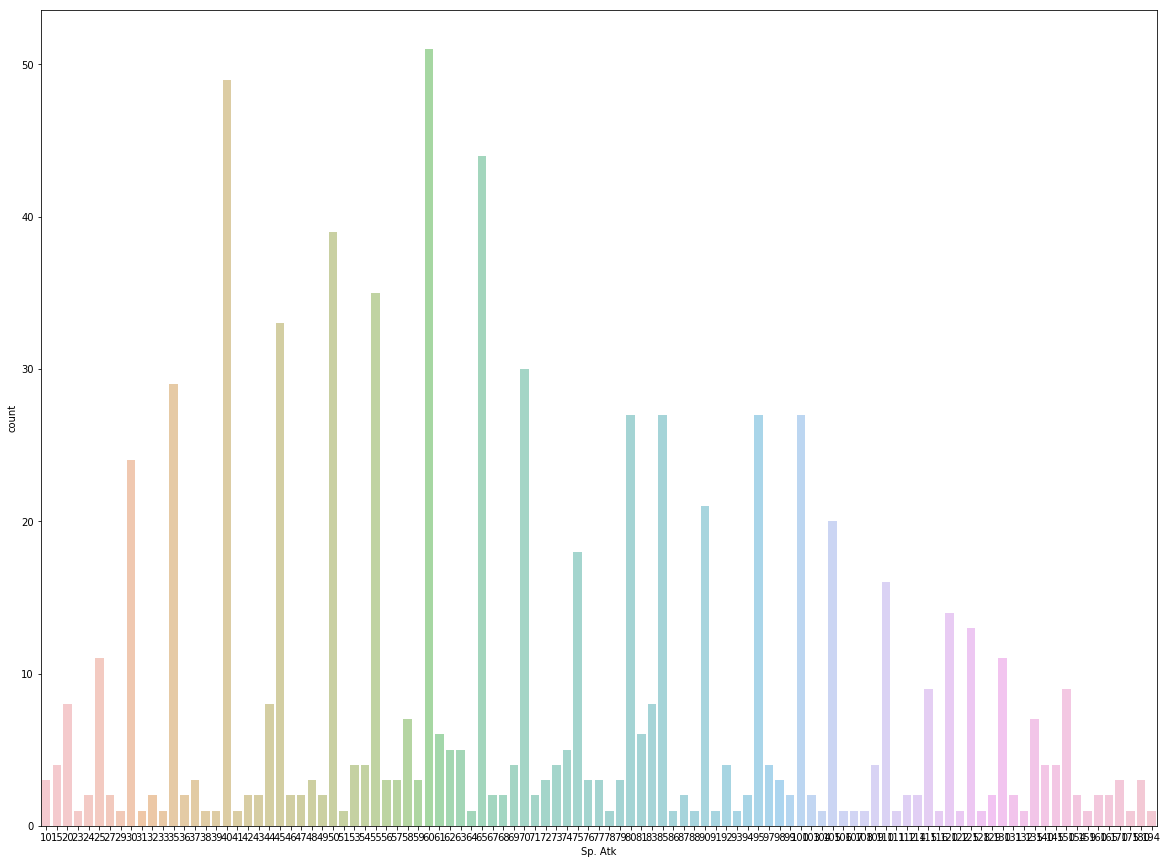

### Sp. Def

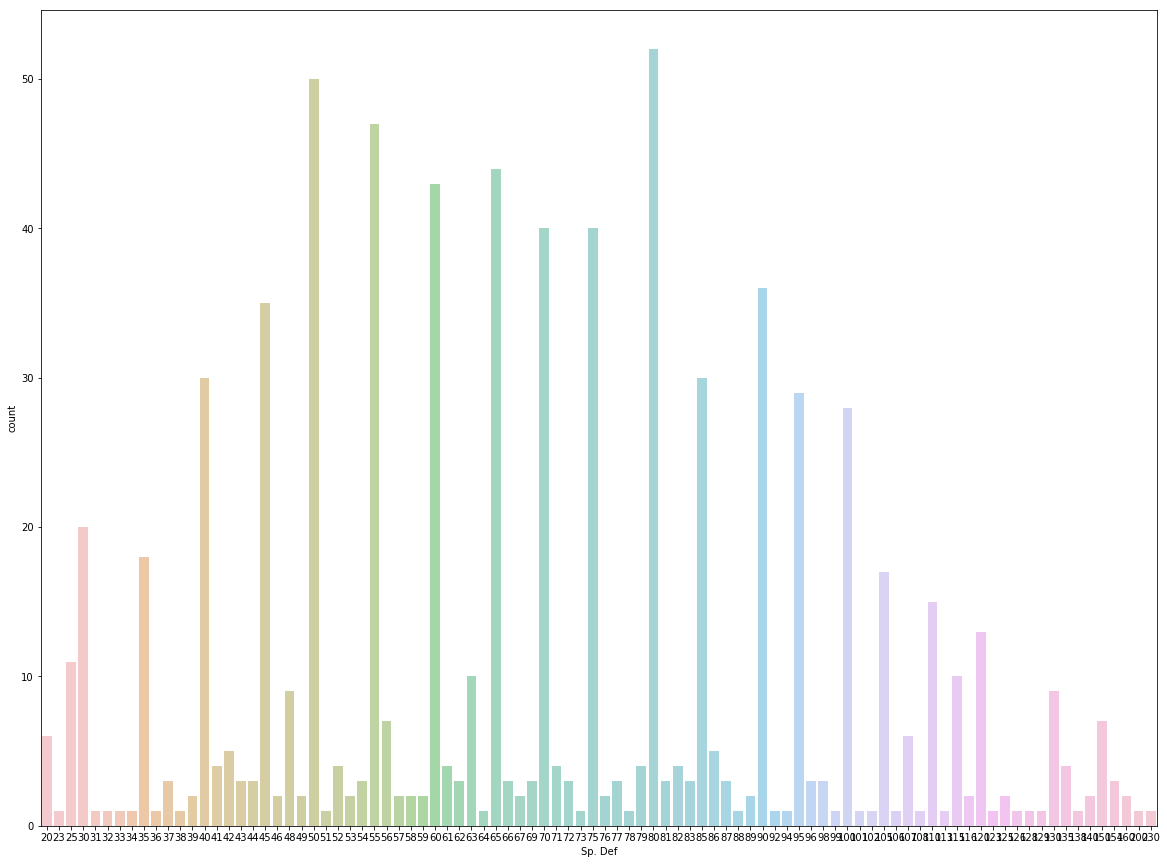

### Speed

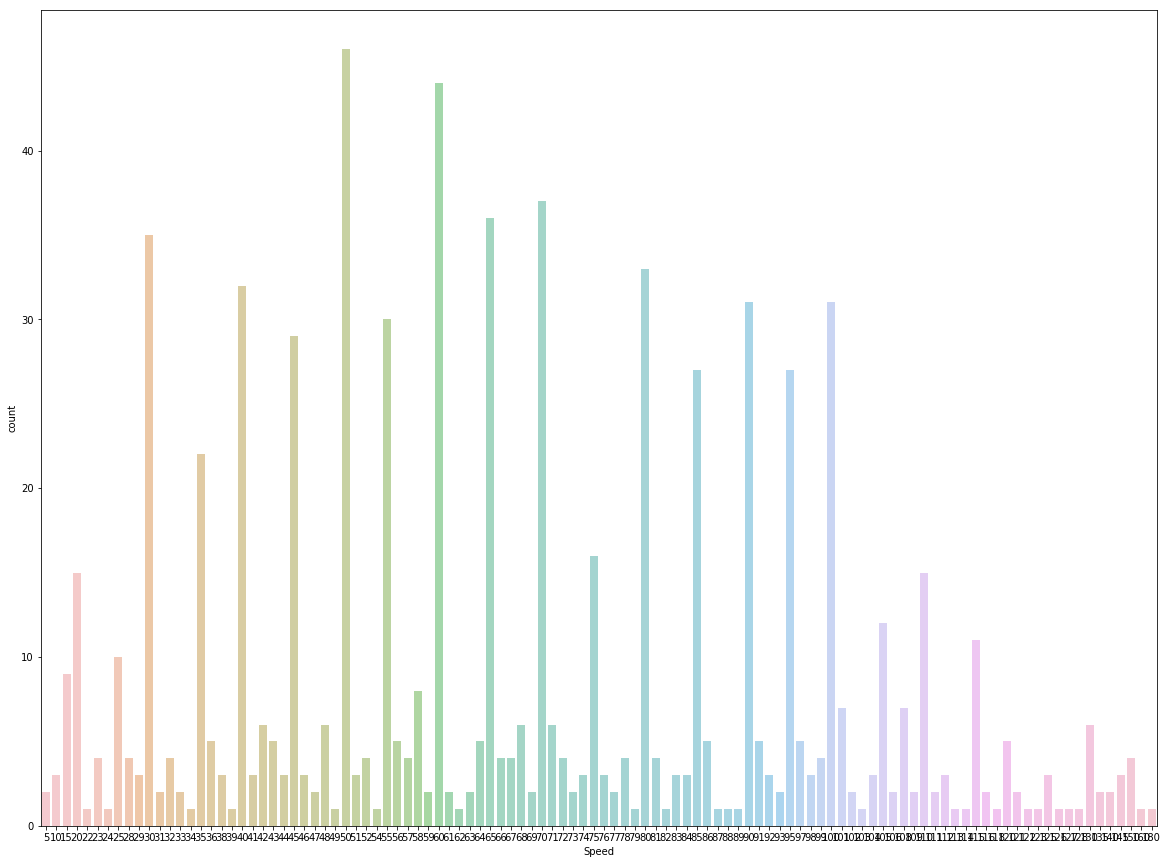

### Generation

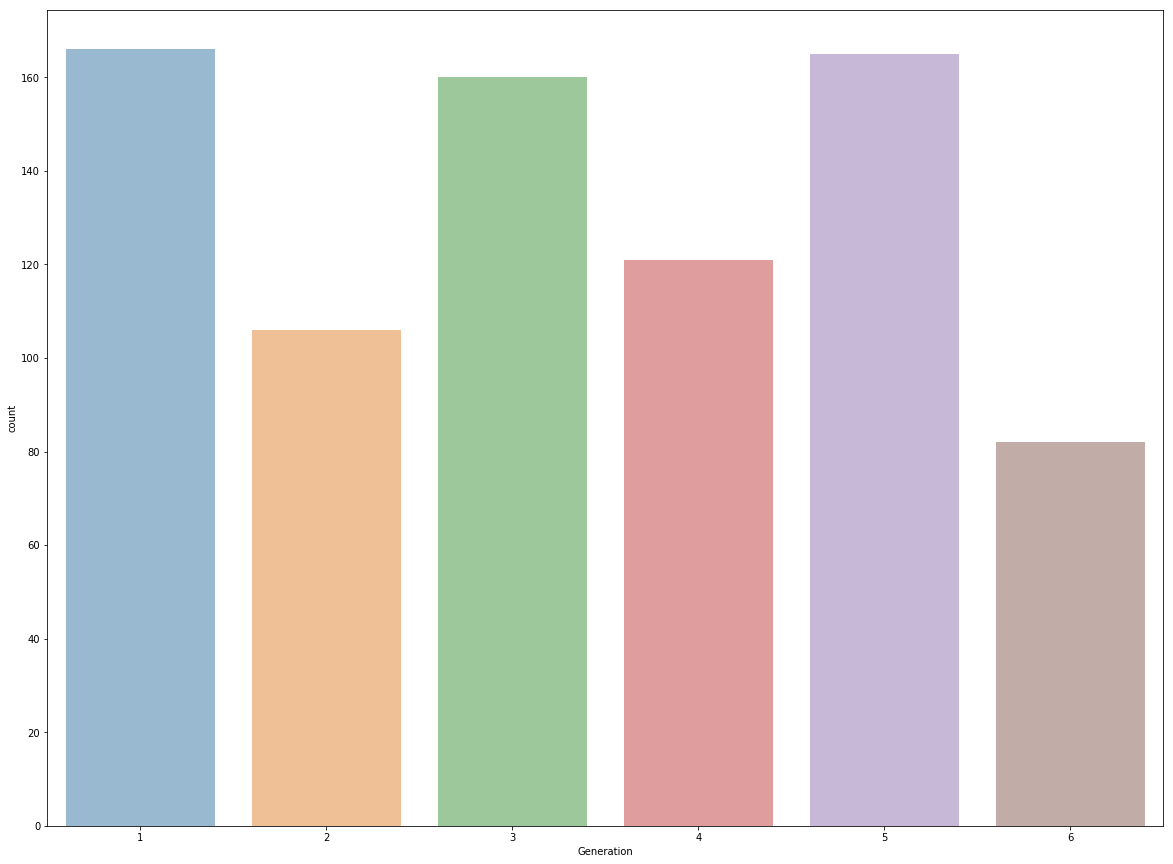

### Legendary

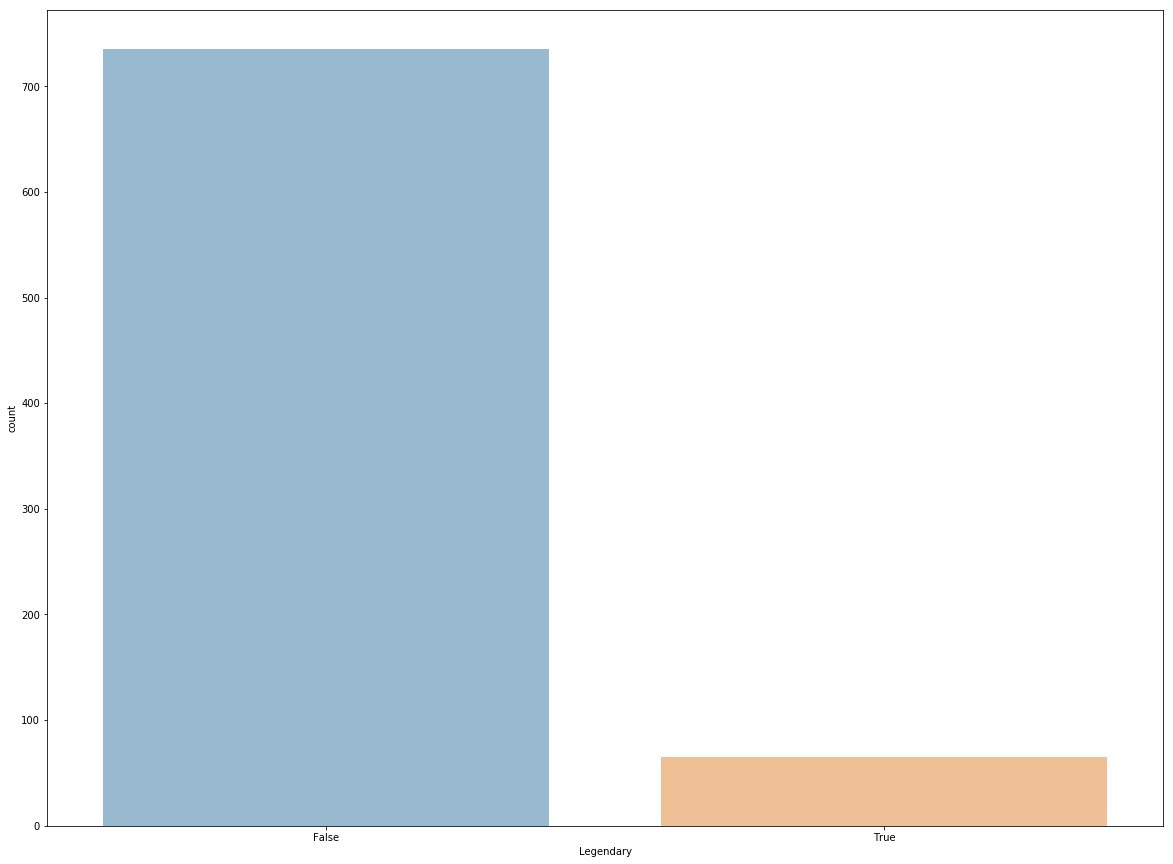

In [25]:
skip_cols = ['#','Name']
for col in df.columns:
    if col in skip_cols:
        continue
        
    display(Markdown('### ' + col))
    
    f, ax = plt.subplots(figsize=(20, 15))
    sns.countplot(x=col, data=df.sort_values(by=[col]), alpha=0.5)
    plt.show()